# Project 1 : Nutrient Additions


### Description: 

Data: These data are from BCC NH4 addition experiements involving Prochlorococcus MIT9215 grown in AMP (artificial seawater medium) under various NH4 treatment groups. 2 biological and 3 technical replicates combine for a total of six Prochlorococcus cell abundance measures via flow cytometry per a chosen time time point. (This was originally done to determine the concentration of nitrogen contaminating our artificial seawater. We are using this data to examine how NH4 concentration affects the batch culture dynamics of Prochlorococcus.) 

 Goal: Import and visualise all treatments of NH4 addition experients in MIT9215. Empirically modeling said is next. 

### Import data 

In [8]:
import pandas as pd
import numpy as np
from matplotlib import *
import matplotlib.pyplot as plt
from scipy.integrate import *
from scipy import *
from pylab import *

In [3]:
df_all = pd.read_csv("/Users/dkm/Documents/Talmy_research/Zinser_and_Ben/Project_1_nutrient_additions/data/NH4_add.csv")

print(df_all)

         id  Time(days)  logscale  org  control   strain         rep1  \
0   NH4_add           0     False  Pro     True  MIT9215       9070.0   
1   NH4_add           1     False  Pro     True  MIT9215      14700.0   
2   NH4_add           4     False  Pro     True  MIT9215      51300.0   
3   NH4_add           5     False  Pro     True  MIT9215      77000.0   
4   NH4_add           7     False  Pro     True  MIT9215     184000.0   
..      ...         ...       ...  ...      ...      ...          ...   
73  NH4_add          15     False  Pro    False  MIT9215    4810000.0   
74  NH4_add          18     False  Pro    False  MIT9215   20400000.0   
75  NH4_add          19     False  Pro    False  MIT9215   31000000.0   
76  NH4_add          25     False  Pro    False  MIT9215  221535830.4   
77  NH4_add          34     False  Pro    False  MIT9215  164413591.5   

           rep2         rep3         rep4  ...  Unnamed: 64  Unnamed: 65  \
0       14200.0      12800.0      10600.0  ... 

### Reformat Data

In [4]:
df_all['rep1'] = df_all['rep1'].fillna(value = 0.0) #filling Nans with 09.0 in 'rep1' column 
df_all['rep2'] = df_all['rep2'].fillna(value = 0.0 )#filling Nans with 09.0 in 'rep2' column 



df_all = df_all.dropna(axis = 1)     #taking NaN columns off the end of df but had to fill rep 1 and 2 Nans first

print(df_all)



         id  Time(days)  logscale  org  control   strain         rep1  \
0   NH4_add           0     False  Pro     True  MIT9215       9070.0   
1   NH4_add           1     False  Pro     True  MIT9215      14700.0   
2   NH4_add           4     False  Pro     True  MIT9215      51300.0   
3   NH4_add           5     False  Pro     True  MIT9215      77000.0   
4   NH4_add           7     False  Pro     True  MIT9215     184000.0   
..      ...         ...       ...  ...      ...      ...          ...   
73  NH4_add          15     False  Pro    False  MIT9215    4810000.0   
74  NH4_add          18     False  Pro    False  MIT9215   20400000.0   
75  NH4_add          19     False  Pro    False  MIT9215   31000000.0   
76  NH4_add          25     False  Pro    False  MIT9215  221535830.4   
77  NH4_add          34     False  Pro    False  MIT9215  164413591.5   

           rep2         rep3         rep4         rep5         rep6  \
0       14200.0      12800.0      10600.0      11800

In [5]:
df_all = df_all.rename({'Time(days)':'times'}, axis=1)    #'renaming column to make it callable by 'times'

####################################

# Slicing Data

####################################

print(df_all['treatment'].value_counts())   #finding how many uniquie counts (different treatments) there are and the number of each

#df_smol = df_all[df_all["treatment"].isin([0,40])]
df_0 = df_all[df_all["treatment"].isin([0])]
df_40 = df_all[df_all["treatment"].isin([40])]
df_400 = df_all[df_all["treatment"].isin([400])]
df_4000 = df_all[df_all["treatment"].isin([4000])]
df_40000 =  df_all[df_all["treatment"].isin([40000])]
df_400000 = df_all[df_all["treatment"].isin([400000])]


rep_cols = ['rep1', 'rep2', 'rep3', 'rep4', 'rep5', 'rep6']     # columns of just replicate assay abundance values
avg_0 = df_0[rep_cols].mean(axis=1) #takes mean value across rep1-6 column first each row
avg_40 = df_40[rep_cols].mean(axis=1)
avg_400 = df_400[rep_cols].mean(axis=1)
avg_4000 = df_4000[rep_cols].mean(axis=1)
avg_40000 = df_40000[rep_cols].mean(axis=1)
avg_400000 = df_400000[rep_cols].mean(axis=1) 



0         13
40        13
400       13
4000      13
40000     13
400000    13
Name: treatment, dtype: int64


## Visualize data 

Text(0, 0.5, 'Cell Abundance (flow)')

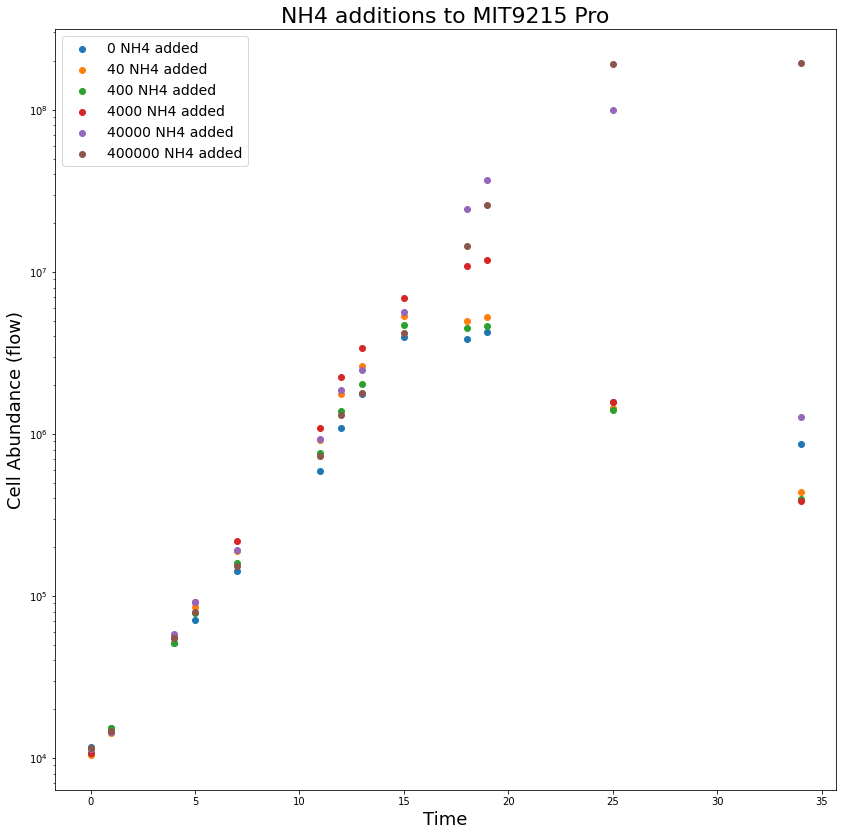

In [6]:

fig , ax = plt.subplots(sharex=True, sharey=True, figsize=(14,14)) 
plt.scatter(x = df_0['times'], y = [avg_0], label = '0 NH4 added')
plt.scatter(x = df_40['times'], y = [avg_40], label = '40 NH4 added')
plt.scatter(x = df_400['times'], y = [avg_400], label = '400 NH4 added')
plt.scatter(x = df_4000['times'], y = [avg_4000], label = '4000 NH4 added')
plt.scatter(x = df_40000['times'], y = [avg_40000], label = '40000 NH4 added')
plt.scatter(x = df_400000['times'], y = [avg_400000], label = '400000 NH4 added') 
plt.semilogy()

plt.legend(fontsize = '14')
plt.title('NH4 additions to MIT9215 Pro', fontsize = '22')
plt.xlabel('Time',fontsize = '18')
#plt.legend(prop={"size":14})
plt.ylabel('Cell Abundance (flow)',fontsize = '18')
#plt.xticks(fontsize = 14) 
#plt.yticks(fontsize = 14)



caveat: These data are currently averaged (accross 6 replicates each) abundance values of the same strain of Pro over time. 

**Thoughts on this data set:** 

 - Not sure if this slicing (putting reps in different columns to prep for being able to use with ODElib) method is causing more issues than it is worth? Currently making it difficult to use anything other than the mean b/c averaging accross the reps is not currentlty not going too well. 

**Hypotheses:**

- The front half of the above figure will be recoverable either, when alpha is kept constant but starting N concentration is taken from the treatment concentration, or when starting N concentration is held steady and the alpha of the treatments is allowed to differ. (See Project 4 jupyter notebook.) 
- Will need to include the delta value of this microbe in our model to fit the back half of this data set. (Increased cell death via increase delta value will be required to explain the differential death kinetics seen above. (Past time 20) 